In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io as sio
np.random.seed(7)

In [3]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/KSC.mat')['KSC']
Label=sio.loadmat('/content/drive/MyDrive/datasets/KSC_gt.mat')['KSC_gt']

Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)

In [5]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

30


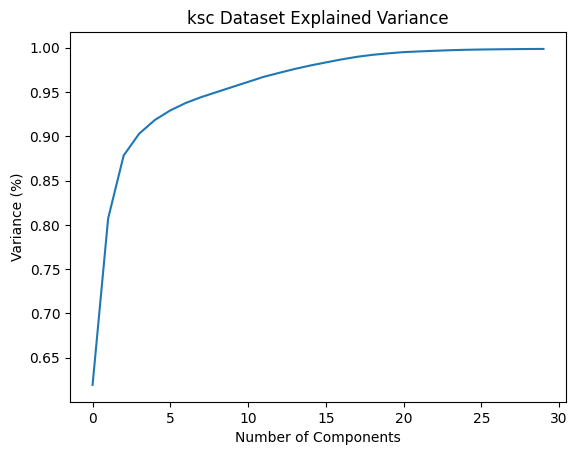

In [7]:
import matplotlib.pyplot as plt
pca = PCA(n_components=30)
pca.fit_transform(X_train)
newspace=pca.components_
newspace=newspace.transpose()
X_train=np.matmul(X_train,newspace)
print(pca.n_components_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('ksc Dataset Explained Variance')
plt.show()
X_test=np.matmul(X_test,newspace)

In [8]:
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

classifiers = []
Train_acc = []
Valid_acc = []
accuracy = -1
accuracy_train = -1

# Adjusted range for C and gamma
for C in np.arange(1, 102, 50):  # Increased step size for C
    for gamma in np.arange(0.001, 0.1, 0.02):  # Increased step size for gamma

        clf = SVC(C=C, gamma=gamma)
        print("----------------------------------------------------------------")
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        y_pred = clf.predict(X_train)
        acc_train = metrics.accuracy_score(y_train, y_pred)
        Train_acc.append(acc_train)
        y_pred = clf.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        Valid_acc.append(acc)

        if acc_train > accuracy_train:
            accuracy_train = acc_train
            best_c_train = C
            best_g_train = gamma
        print(f"C_train= {C} Best C_train = {best_c_train} gamma_train = {gamma} best_gamma_train = {best_g_train} Accuracy_train = {acc_train} Best Accuracy_train = {accuracy_train}\n")

        if acc > accuracy:
            accuracy = acc
            best_c = C
            best_g = gamma
        print(f"C= {C} Best C = {best_c} gamma = {gamma} best_gamma = {best_g} Accuracy = {acc} Best Accuracy = {accuracy}\n")


----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.001 best_gamma_train = 0.001 Accuracy_train = 0.8301343570057581 Best Accuracy_train = 0.8301343570057581

C= 1 Best C = 1 gamma = 0.001 best_gamma = 0.001 Accuracy = 0.8274209012464045 Best Accuracy = 0.8274209012464045

----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.021 best_gamma_train = 0.021 Accuracy_train = 0.9385796545105566 Best Accuracy_train = 0.9385796545105566

C= 1 Best C = 1 gamma = 0.021 best_gamma = 0.021 Accuracy = 0.9328859060402684 Best Accuracy = 0.9328859060402684

----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.041 best_gamma_train = 0.041 Accuracy_train = 0.9481765834932822 Best Accuracy_train = 0.9481765834932822

C= 1 Best C = 1 gamma = 0.041 best_gamma = 0.041 Accuracy = 0.9424736337488016 Best Accuracy = 0.9424736337488016

-------

In [9]:
import pandas as pd
clf = SVC(C=51,gamma=0.006,decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))


Accuracy : 95.9731543624161
Cohen Kappa Score : 95.51301355130136
              precision    recall  f1-score   support

           1       0.94      0.97      0.95       152
           2       0.98      1.00      0.99        49
           3       0.94      0.96      0.95        51
           4       0.81      0.84      0.82        50
           5       0.79      0.72      0.75        32
           6       0.85      0.72      0.78        46
           7       1.00      0.90      0.95        21
           8       0.98      0.99      0.98        86
           9       0.96      1.00      0.98       104
          10       0.99      1.00      0.99        81
          11       1.00      0.99      0.99        84
          12       1.00      0.99      1.00       101
          13       1.00      1.00      1.00       186

    accuracy                           0.96      1043
   macro avg       0.94      0.93      0.93      1043
weighted avg       0.96      0.96      0.96      1043



In [10]:
print(pd.DataFrame(mat))

     0   1   2   3   4   5   6   7    8   9   10   11   12
0   147   0   0   0   0   9   0   0    0   0   0    0    0
1     0  49   0   0   0   0   1   0    0   0   0    0    0
2     0   0  49   2   0   1   0   0    0   0   0    0    0
3     0   0   1  42   8   1   0   0    0   0   0    0    0
4     0   0   0   4  23   2   0   0    0   0   0    0    0
5     3   0   0   2   0  33   1   0    0   0   0    0    0
6     0   0   0   0   0   0  19   0    0   0   0    0    0
7     2   0   0   0   0   0   0  85    0   0   0    0    0
8     0   0   1   0   1   0   0   1  104   0   1    0    0
9     0   0   0   0   0   0   0   0    0  81   0    1    0
10    0   0   0   0   0   0   0   0    0   0  83    0    0
11    0   0   0   0   0   0   0   0    0   0   0  100    0
12    0   0   0   0   0   0   0   0    0   0   0    0  186
